In [1]:
import numpy as np
import pandas as pd
import folium
import re
!pip install geopandas
import matplotlib
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 4.9 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


In [2]:
df_covid =pd.read_csv('/content/drive/MyDrive/GIS 5080/complete.csv')
df_covid.head()

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
0,2020-01-30,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
1,2020-01-31,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
2,2020-02-01,Kerala,10.8505,76.2711,2.0,0,0.0,1,0,0
3,2020-02-02,Kerala,10.8505,76.2711,3.0,0,0.0,1,0,0
4,2020-02-03,Kerala,10.8505,76.2711,3.0,0,0.0,0,0,0


In [3]:
import geopandas as gpd
india_geojson = gpd.read_file('/content/drive/MyDrive/GIS 5080/india.json')
india_geojson.head()

,id,district,dt_code,st_nm,st_code,year,geometry
0,NaN,Aizawl,261,Mizoram,15,2011_c,"POLYGON ((93.04466 23.41052, 92.94680 23.51363..."
1,NaN,Champhai,262,Mizoram,15,2011_c,"MULTIPOLYGON (((93.04619 23.66623, 93.04466 23..."
2,NaN,Kolasib,263,Mizoram,15,2011_c,"POLYGON ((92.89633 24.39072, 92.86116 24.31374..."
3,NaN,Lawngtlai,264,Mizoram,15,2011_c,"POLYGON ((92.93456 22.55405, 92.93150 22.39458..."
4,NaN,Lunglei,265,Mizoram,15,2011_c,"POLYGON ((92.67307 23.38303, 92.68989 23.32804..."


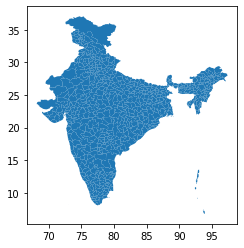

In [4]:
india_geojson.plot()

In [5]:
df_covid.isnull().sum()

Date                         0
Name of State / UT           0
Latitude                     0
Longitude                    0
Total Confirmed cases        0
Death                        0
Cured/Discharged/Migrated    0
New cases                    0
New deaths                   0
New recovered                0
dtype: int64

In [6]:
df_covid.dtypes

Date                          object
Name of State / UT            object
Latitude                     float64
Longitude                    float64
Total Confirmed cases        float64
Death                         object
Cured/Discharged/Migrated    float64
New cases                      int64
New deaths                     int64
New recovered                  int64
dtype: object

In [7]:
df_covid['Date'] = pd.to_datetime(df_covid['Date']).apply(lambda x: x - pd.DateOffset(days = 1))

In [8]:
df_covid['Name of State / UT'].unique()

array(['Kerala', 'Delhi', 'Telengana', 'Haryana', 'Rajasthan',
       'Uttar Pradesh', 'Tamil Nadu', 'Union Territory of Ladakh',
       'Karnataka', 'Maharashtra', 'Punjab',
       'Union Territory of Jammu and Kashmir', 'Andhra Pradesh',
       'Uttarakhand', 'Odisha', 'Puducherry', 'West Bengal',
       'Chhattisgarh', 'Union Territory of Chandigarh', 'Gujarat',
       'Chandigarh', 'Himachal Pradesh', 'Jammu and Kashmir', 'Ladakh',
       'Madhya Pradesh', 'Bihar', 'Manipur', 'Mizoram',
       'Andaman and Nicobar Islands', 'Goa', 'Assam', 'Jharkhand',
       'Arunachal Pradesh', 'Tripura', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu', 'Sikkim', 'Nagaland',
       'Telangana', 'Telangana***'], dtype=object)

In [9]:
df_covid['Name of State / UT'] = df_covid['Name of State / UT'].apply(lambda x: re.sub('Union Territory of ', '', x))
df_covid['Name of State / UT'].replace('Telengana','Telangana', inplace = True)
df_covid['Name of State / UT'].replace('Dadar Nagar Haveli','Dadra and Nagar Haveli', inplace = True)


In [10]:
id_dict = {'Andaman and Nicobar Islands': '0',
	'Arunachal Pradesh': '1',
	'Assam': '2',
	'Bihar': '3',
	'Chandigarh': '4',
	'Chhattisgarh': '5',
	'Dadra and Nagar Haveli': '6',
	'Daman and Diu': '7',
  'Goa': '8',
  'Gujarat': '9',
	'Haryana': '10',
	'Himachal Pradesh': '11',
	'Jharkhand': '12',
	'Karnataka': '13',
	'Kerala': '14',
	'Lakshadweep': '15',
	'Madhya Pradesh': '16',
	'Maharashtra': '17',
	'Manipur': '18',
	'Meghalaya': '19',
	'Mizoram': '20',
	'Nagaland': '21',
	'Delhi': '22',
	'Puducherry': '23',
	'Punjab': '24',
	'Rajasthan': '25',
	'Sikkim': '26',
	'Tamil Nadu': '27',
	'Telangana': '28',
	'Tripura': '29',
	'Uttar Pradesh': '30',
	'Uttarakhand': '31',
	'West Bengal': '32',
	'Odisha': '33',
	'Andhra Pradesh': '34',
	'Jammu and Kashmir': '35',
	'Ladakh': '36'}

In [11]:
df_covid['state_id'] = df_covid['Name of State / UT'].map(id_dict)

In [12]:
df_covid['Death'] = df_covid['Death'].apply(lambda x: int(x.split()[0].replace('#', '')))

In [13]:
df_covid['Active Cases'] = df_covid['Total Confirmed cases'] - (df_covid['Cured/Discharged/Migrated'] + df_covid['Death'])
df_covid.head()

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered,state_id,Active Cases
0,2020-01-29,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0,14,1.0
1,2020-01-30,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0,14,1.0
2,2020-01-31,Kerala,10.8505,76.2711,2.0,0,0.0,1,0,0,14,2.0
3,2020-02-01,Kerala,10.8505,76.2711,3.0,0,0.0,1,0,0,14,3.0
4,2020-02-02,Kerala,10.8505,76.2711,3.0,0,0.0,0,0,0,14,3.0


In [14]:
bins = np.linspace(min(df_covid['Active Cases']), max(df_covid['Active Cases']), 11)
bins

array([     0. ,  15096.6,  30193.2,  45289.8,  60386.4,  75483. ,
        90579.6, 105676.2, 120772.8, 135869.4, 150966. ])

In [15]:
df_covid['color'] = pd.cut(df_covid['Active Cases'], bins, labels = ['#FFEBEB','#F8D2D4','#F2B9BE','#EBA1A8','#E58892','#DE6F7C','#D85766','#D13E50','#CB253A','#C50D24'], include_lowest=False)

df_covid['color'].replace(np.nan,'#32CD32', inplace = True)


In [16]:
df_covid = df_covid[['Date','state_id','color']]
df_covid.head()

,Date,state_id,color
0,2020-01-29,14,#FFEBEB
1,2020-01-30,14,#FFEBEB
2,2020-01-31,14,#FFEBEB
3,2020-02-01,14,#FFEBEB
4,2020-02-02,14,#FFEBEB


In [17]:
for date in df_covid['Date'].unique():
  diff = set([str(i) for i in range(37)]) - set(df_covid[df_covid['Date'] == date]['state_id'])
  for i in diff:
    df_covid = pd.concat([df_covid, pd.DataFrame([[date,'#0073CF', i]], columns = ['Date','color','state_id'])], ignore_index=True)

df_covid.sort_values('Date', inplace = True)
df_covid.head()

,Date,state_id,color
0,2020-01-29,14,#FFEBEB
4706,2020-01-29,0,#0073CF
4707,2020-01-29,9,#0073CF
4709,2020-01-29,1,#0073CF
4710,2020-01-29,31,#0073CF


In [33]:
df_covid['Date'] = (df_covid['Date'].astype(int)// 10**9).astype('U10')
covid_dict = {}

for i in df_covid['state_id'].unique():
  covid_dict[i] = {}
  for j in df_covid[df_covid['state_id'] == i].set_index(['state_id']).values:
    covid_dict[i][j[0]] = {'color': j[1], 'opacity':0.7}

In [34]:
df_covid['Date'] = (df_covid['Date'].astype(int)//10**9).astype('U10')
covid_dict = {}
for i in df_covid['state_id'].unique():
  covid_dict[i] = {}
  for j in df_covid[df_covid['state_id'] == i].set_index(['state_id']).values:
    covid_dict[i][j[0]] = {'color':j[1], 'opacity':0.7}


In [35]:
list(covid_dict.items())[10]

('7', {'0': {'color': '#0073CF', 'opacity': 0.7}})

In [36]:
india_geojson['state_id'] = india_geojson['st_nm'].map(id_dict)
india_geojson.drop(columns = 'st_nm',inplace = True)
india_geojson.head()

KeyError: ignored

In [ ]:
from folium.plugins import TimeSliderChoropleth

In [ ]:
from branca.element import Figure
fig6 = Figure(height = 850, width = 1000)
m6 = folium.Map([24, 84], tiles = 'cartodbpositron', zoom_start = 5)
fig6.add_child(m6)

In [ ]:
g = TimeSliderChoropleth(
	    india_geojson.set_index('state_id').to_json(),
	    styledict = covid_dict
	).add_to(m6)
m6
